In [2]:
import numpy as np
import pandas as pd

matches = pd.read_csv(r"/home/soham-saxena/Downloads/matches.csv")
deliveries = pd.read_csv(r"/home/soham-saxena/Downloads/deliveries.csv")

In [4]:
import matplotlib.pyplot as plt

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<Axes: xlabel='season'>

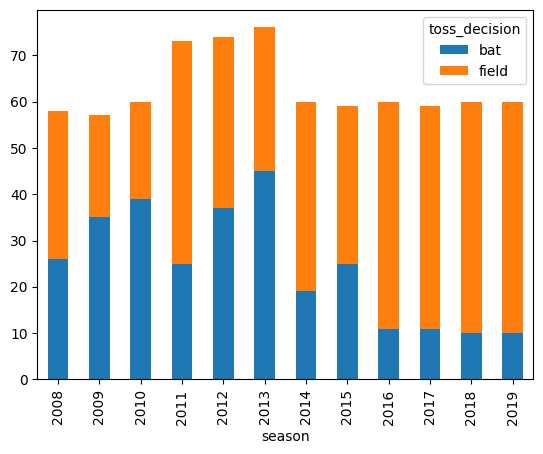

In [44]:
grouped = matches.groupby(["season", "toss_decision"]).size().unstack()
grouped.plot(kind = "bar", stacked = True)

In [17]:
freq = matches["player_of_match"].value_counts()
filtered_freq = freq[freq > 3]
maximum = freq.max()
print(filtered_freq[filtered_freq == maximum].to_dict())

{'CH Gayle': 21}


In [63]:
matches.loc[matches["win_by_runs"].idxmax(), "venue"]


'Feroz Shah Kotla'

In [45]:
grouped

toss_decision,bat,field
season,,
2008,26,32
2009,35,22
2010,39,21
2011,25,48
2012,37,37
2013,45,31
2014,19,41
2015,25,34
2016,11,49


<Axes: xlabel='dismissal_kind'>

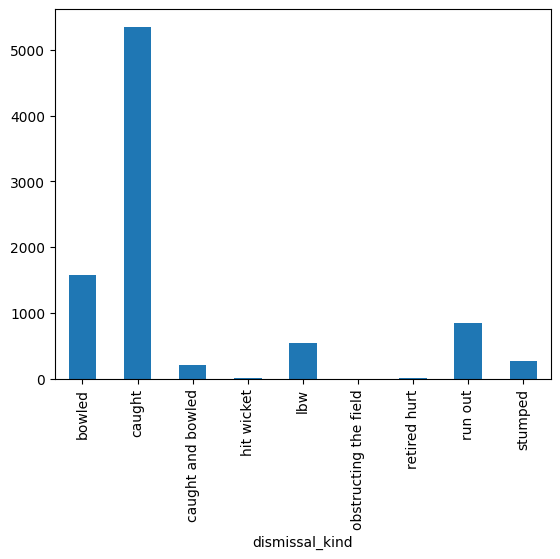

In [68]:
to_plot = deliveries.groupby("dismissal_kind").size()
to_plot.plot(kind = "bar", stacked = True)

In [58]:
print(matches["toss_winner"])
tosses = matches["toss_winner"].value_counts()
tosses.idxmax()

0      Royal Challengers Bangalore
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
4      Royal Challengers Bangalore
                  ...             
751                 Mumbai Indians
752            Chennai Super Kings
753                 Delhi Capitals
754            Chennai Super Kings
755                 Mumbai Indians
Name: toss_winner, Length: 756, dtype: object


'Mumbai Indians'

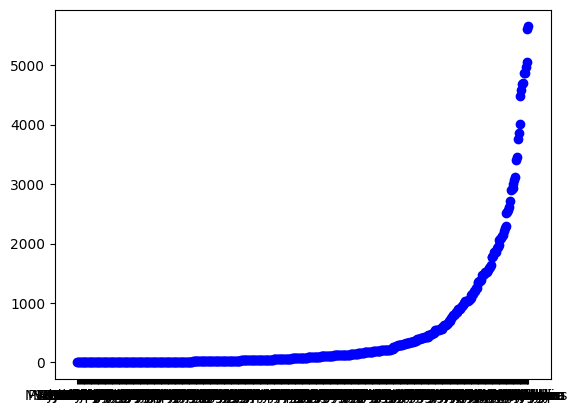

In [83]:
To_plot = deliveries.groupby("batsman")["total_runs"].sum()
To_plot = pd.DataFrame(To_plot)
Sorted = To_plot.sort_values("total_runs")
Sorted = Sorted.reset_index()
plt.scatter(Sorted["batsman"], Sorted["total_runs"], color = "blue")